<a href="https://colab.research.google.com/github/ZhiLi51/Final-Project-on-large-cap-crypto-trading-with-macroeconomical-variables/blob/main/bitcoin_price_prediction_with_artificial_neural_ne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitcoin price prediction with artificial neural networks

In this notebook, we have tried to build a model that can predict stock prices with the help of neural networks.We use the Keras library to build and train our neural network.

In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.1 MB/s 
     |████████████████████████████████| 6.4 MB 15.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


### Import necessary libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import Sequential
from keras.layers import Dropout,Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [5]:
from tensorflow.keras.utils import plot_model

In [6]:
import datetime as time

### Get data from Yahoo Finance

In [7]:
data=yf.download("BTC-USD",start='2014-09-17',stop=time.date.today())

[*********************100%***********************]  1 of 1 completed


## Visualization and data analysis 

In [8]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-05-08,35502.941406,35502.941406,33878.964844,34059.265625,34059.265625,36763041910
2022-05-09,34060.015625,34222.074219,30296.953125,30296.953125,30296.953125,63355494961
2022-05-10,30273.654297,32596.308594,29944.802734,31022.906250,31022.906250,59811038817


In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2795.000000,2795.000000,2795.000000,2795.000000,2795.000000,2.795000e+03
mean,12166.895990,12485.772127,11812.549449,12175.066372,12175.066372,1.514786e+10
std,16625.809096,17057.492535,16127.488680,16623.205279,16623.205279,1.998577e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,614.291504,620.583496,610.192017,615.648010,615.648010,8.341835e+07
50%,6468.439941,6561.720215,6361.549805,6474.750000,6474.750000,5.464420e+09
75%,11100.866699,11435.512207,10829.992188,11105.840820,11105.840820,2.577328e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


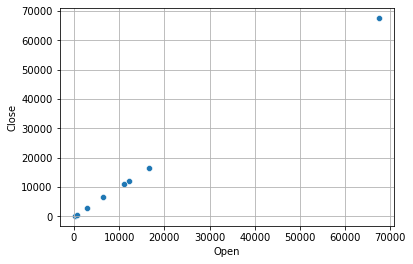

In [11]:
sb.scatterplot(data.describe()["Open"],data.describe()["Close"],);
plt.grid()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2795 entries, 2014-09-17 to 2022-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2795 non-null   float64
 1   High       2795 non-null   float64
 2   Low        2795 non-null   float64
 3   Close      2795 non-null   float64
 4   Adj Close  2795 non-null   float64
 5   Volume     2795 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 152.9 KB


Text(1.0, 1.0, 'low values')

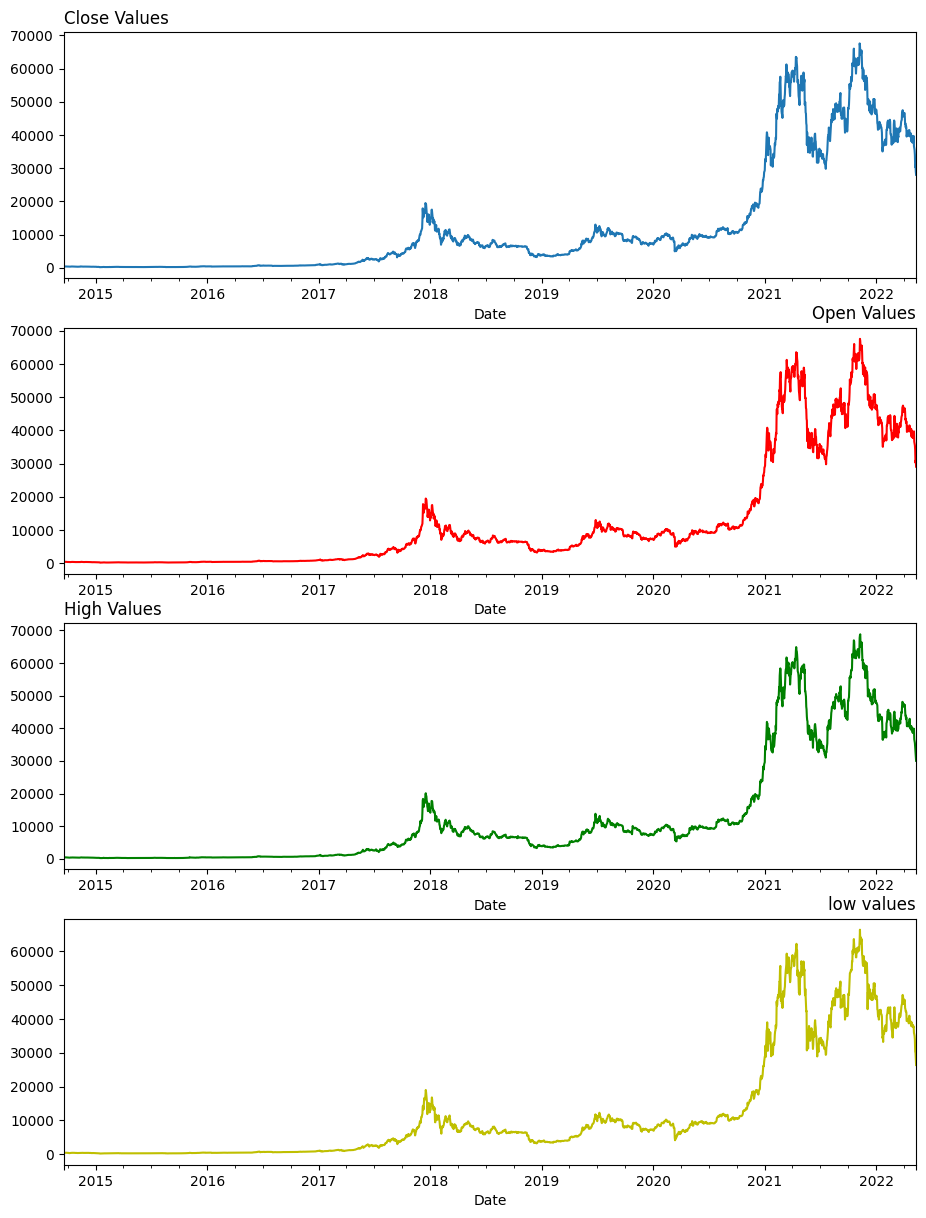

In [13]:
plt.figure(figsize=(11,15),dpi=100)
plt.subplot(411)
data.Close.plot()
plt.title("Close Values",loc="left")
plt.subplot(412)
data.Open.plot(c="r")
plt.title("Open Values",loc="right")
plt.subplot(413)
data.High.plot(c="g")
plt.title("High Values",loc="left")
plt.subplot(414)
data.Low.plot(c="y")
plt.title("low values",loc="right")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


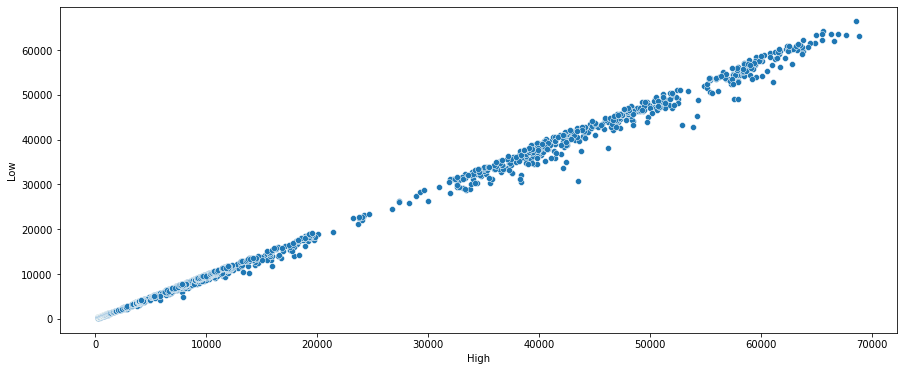

In [14]:
plt.figure(figsize=(15,6))
sb.scatterplot(data.High,data.Low)

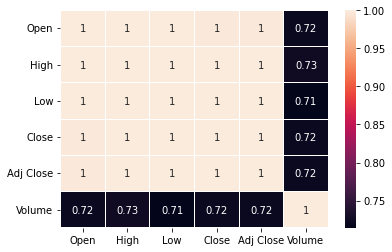

In [15]:
sb.heatmap(data.corr(),annot=True,linewidths=0.01)

### Train_test_split data

In [16]:
x=data.drop("Close",axis=1)
y=data.Close
x_full_train,x_test,y_full_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
x_train,x_val,y_train,y_val=train_test_split(x_full_train,y_full_train,test_size=0.2)

# create model

In [18]:
model=Sequential()
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(50,activation="linear"))
model.add(BatchNormalization())
model.add(Dense(40,activation="relu"))
model.add(Dense(1,activation="linear"))

In [19]:
model.compile(optimizer="adam",loss="mean_squared_error")

## Model training 

In [20]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_val,y_val))

Epoch 1/100
56/56 [==============================] - 1s 6ms/step - loss: 417695200.0000 - val_loss: 492535264.0000
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 417068064.0000 - val_loss: 490508320.0000
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 415608128.0000 - val_loss: 487339008.0000
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 412913824.0000 - val_loss: 483065280.0000
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 408771232.0000 - val_loss: 477085536.0000
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 402921792.0000 - val_loss: 468681536.0000
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 395269472.0000 - val_loss: 457727488.0000
Epoch 8/100
56/56 [==============================] - 0s 3ms/step - loss: 385359072.0000 - val_loss: 443923136.0000
Epoch 9/100
56/56 [==============================] - 0s 3ms/step - loss: 3729777

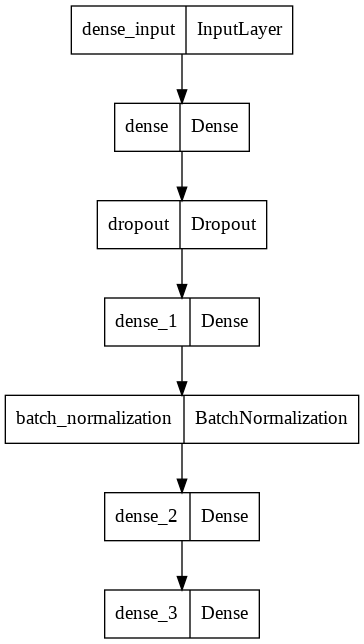

In [21]:
plot_model(model)

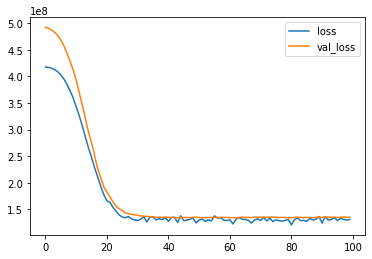

In [22]:
pd.DataFrame(history.history).plot()

### **predict**

In [23]:
y_pred=model.predict(x_test)

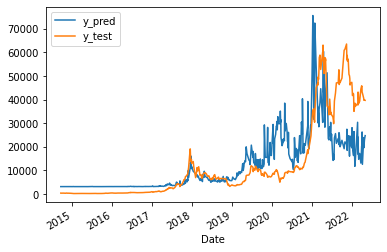

In [24]:
y_=pd.DataFrame(data=y_pred,index=y_test.index,columns=["y_pred"])
y_["y_test"]=y_test.values
y_.plot()